In [1]:
import pandas as pd
from constants import INPUT_CSV_PATH, TABLE_NAME
from pandas_profiling import ProfileReport
from data_import import initialize,connection
from functions import get_connection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

initialize()

In [2]:
calls: pd.DataFrame = pd.read_sql_table(con=connection, table_name=TABLE_NAME)

Transform data type for column 'date'

In [3]:
calls['fecha']=pd.to_datetime(calls['fecha'])

Text(0.5, 1.0, 'age repartition')

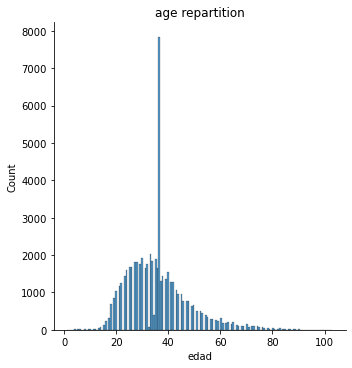

In [4]:
sns.displot(calls, x="edad")
plt.title('age repartition')

Text(0.5, 1.0, 'G')

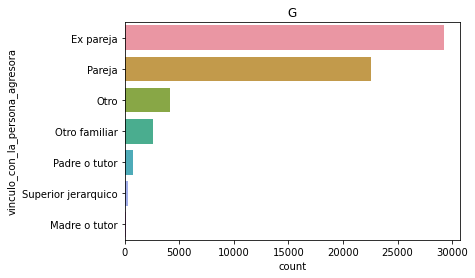

In [5]:
sns.set_palette("RdBu")
sns.countplot(y="vinculo_con_la_persona_agresora", data=calls , order=calls['vinculo_con_la_persona_agresora'].value_counts().index)
plt.title('G')

Text(0.5, 1.0, 'G')

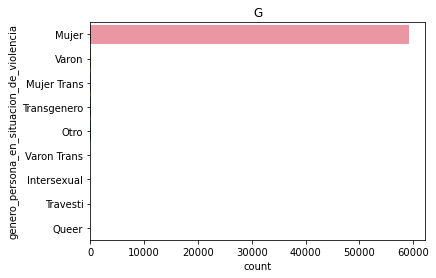

In [6]:
sns.set_palette("RdBu")
sns.countplot(y="genero_persona_en_situacion_de_violencia", data=calls , order=calls['genero_persona_en_situacion_de_violencia'].value_counts().index)
plt.title('G')

<AxesSubplot:xlabel='count', ylabel='prov_residencia_persona_en_situacion_violencia'>

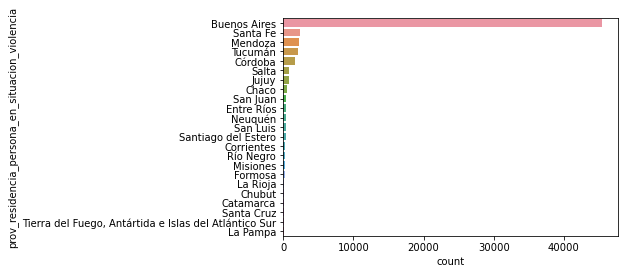

In [7]:
sns.countplot(y='prov_residencia_persona_en_situacion_violencia', data=calls, order=calls['prov_residencia_persona_en_situacion_violencia'].value_counts().index)


(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.,
        18993., 19083., 19174.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07')])

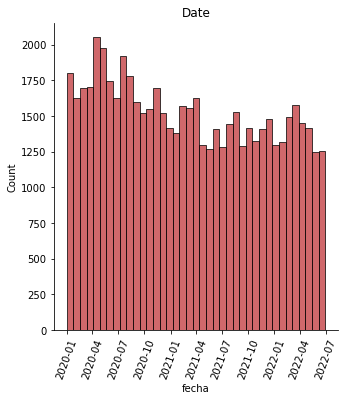

In [8]:
sns.set_palette("RdBu")
sns.displot(calls, x="fecha")
plt.title('Date')
plt.xticks(rotation=70)

/Users/angelaivonnesalgadobeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/angelaivonnesalgadobeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/angelaivonnesalgadobeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

<AxesSubplot:xlabel='tipo_de_violencia_simbolica', ylabel='count'>

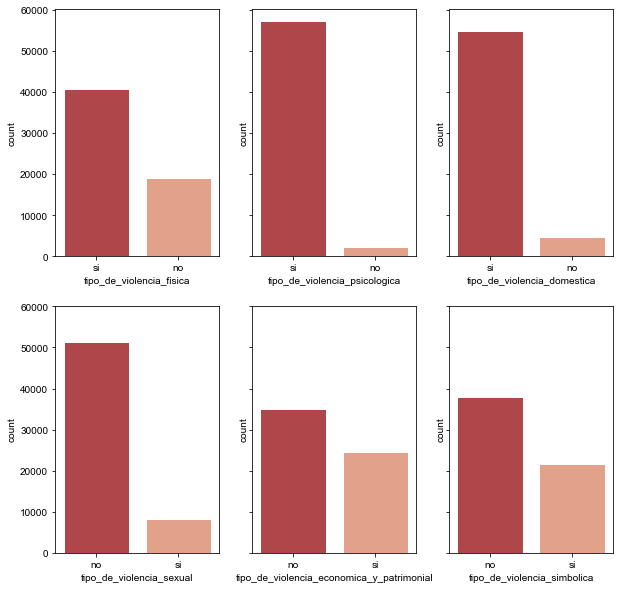

In [9]:
fig, ax = plt.subplots(2,3, sharey=True, figsize=(10,10))
sns.set_style("whitegrid")
sns.set_palette("RdBu")
sns.axes_style()

sns.countplot(calls['tipo_de_violencia_fisica'], ax=ax[0,0])
sns.countplot(calls['tipo_de_violencia_psicologica'], ax=ax[0,1])
sns.countplot(calls['tipo_de_violencia_domestica'], ax=ax[0,2])
sns.countplot(calls['tipo_de_violencia_sexual'], ax=ax[1,0])
sns.countplot(calls['tipo_de_violencia_economica_y_patrimonial'], ax=ax[1,1])
sns.countplot(calls['tipo_de_violencia_simbolica'], ax=ax[1,2])

/Users/angelaivonnesalgadobeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/angelaivonnesalgadobeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/angelaivonnesalgadobeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

<AxesSubplot:xlabel='modalidad_de_violencia_otras', ylabel='count'>

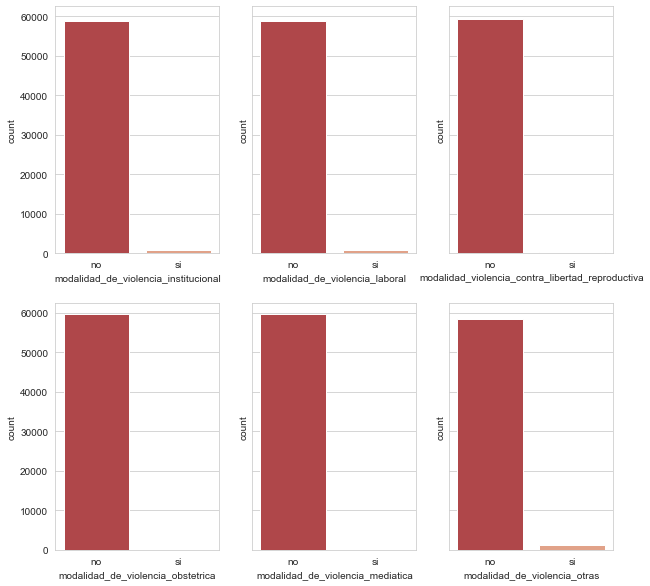

In [10]:
fig, ax = plt.subplots(2,3, sharey=True, figsize=(10,10))
sns.set_style("whitegrid")
sns.set_palette("RdBu")
sns.axes_style()

sns.countplot(calls['modalidad_de_violencia_institucional'], ax=ax[0,0])
sns.countplot(calls['modalidad_de_violencia_laboral'], ax=ax[0,1])
sns.countplot(calls['modalidad_violencia_contra_libertad_reproductiva'], ax=ax[0,2])
sns.countplot(calls['modalidad_de_violencia_obstetrica'], ax=ax[1,0])
sns.countplot(calls['modalidad_de_violencia_mediatica'], ax=ax[1,1])
sns.countplot(calls['modalidad_de_violencia_otras'], ax=ax[1,2])

interval columns not set, guessing: ['Unnamed: 0', 'media_edad', 'edad']


<AxesSubplot:>

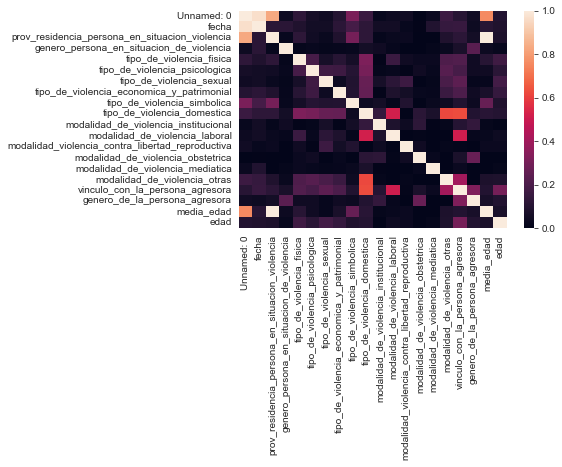

In [11]:
import phik
sns.heatmap(calls.phik_matrix())

# -------Encoding--------

In [12]:
encoder = LabelEncoder()
calls['prov_residencia_persona_en_situacion_violencia_encode']=encoder.fit_transform(calls['prov_residencia_persona_en_situacion_violencia'])
calls['genero_persona_en_situacion_de_violencia_encode']=encoder.fit_transform(calls['genero_persona_en_situacion_de_violencia'])

calls['tipo_de_violencia_fisica_encode']=encoder.fit_transform(calls['tipo_de_violencia_fisica'])
calls['tipo_de_violencia_psicologica_encode']=encoder.fit_transform(calls['tipo_de_violencia_psicologica'])
calls['tipo_de_violencia_sexual_encode']=encoder.fit_transform(calls['tipo_de_violencia_sexual'])
calls['tipo_de_violencia_economica_y_patrimonial_encode']=encoder.fit_transform(calls['tipo_de_violencia_economica_y_patrimonial'])
calls['tipo_de_violencia_simbolica_encode']=encoder.fit_transform(calls['tipo_de_violencia_simbolica'])
calls['tipo_de_violencia_domestica_encode']=encoder.fit_transform(calls['tipo_de_violencia_domestica'])

calls['modalidad_de_violencia_institucional_encode']=encoder.fit_transform(calls['modalidad_de_violencia_institucional'])
calls['modalidad_de_violencia_laboral_encode']=encoder.fit_transform(calls['modalidad_de_violencia_laboral'])
calls['modalidad_violencia_contra_libertad_reproductiva_encode']=encoder.fit_transform(calls['modalidad_violencia_contra_libertad_reproductiva'])
calls['modalidad_de_violencia_obstetrica_encode']=encoder.fit_transform(calls['modalidad_de_violencia_obstetrica'])
calls['modalidad_de_violencia_mediatica_encode']=encoder.fit_transform(calls['modalidad_de_violencia_mediatica'])
calls['modalidad_de_violencia_otras_encode']=encoder.fit_transform(calls['modalidad_de_violencia_otras'])

calls['vinculo_con_la_persona_agresora_encode']=encoder.fit_transform(calls['vinculo_con_la_persona_agresora'])

calls['genero_de_la_persona_agresora_encode']=encoder.fit_transform(calls['genero_de_la_persona_agresora'])

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(calls['genero_persona_en_situacion_de_violencia'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Intersexual': 0, 'Mujer': 1, 'Mujer Trans': 2, 'Otro': 3, 'Queer': 4, 'Transgenero': 5, 'Travesti': 6, 'Varon': 7, 'Varon Trans': 8}


/var/folders/pw/szr0m5sn17vgnpycyzj91y5r0000gn/T/ipykernel_5118/1006748464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(calls.corr())


Text(0.5, 1.0, 'correlation in the dataframe')

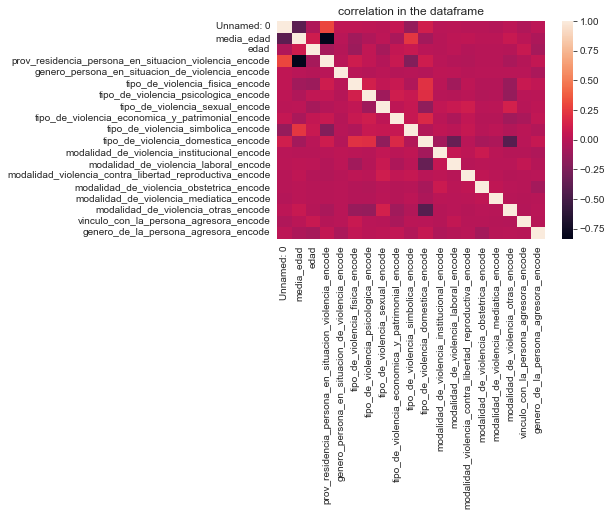

In [14]:
sns.heatmap(calls.corr())
plt.title('correlation in the dataframe')

In [15]:
calls['consolidado_violencias']=calls['tipo_de_violencia_fisica_encode']+ calls['tipo_de_violencia_psicologica_encode'] + calls['tipo_de_violencia_sexual_encode'] + calls['tipo_de_violencia_economica_y_patrimonial_encode'] + calls['tipo_de_violencia_domestica_encode']

In [16]:
s1= calls['consolidado_violencias'].where(lambda x : x ==0).dropna()
indexes_to_drop=list(s1.keys())
indexes_to_drop
calls = calls.drop(labels=indexes_to_drop, axis=0)
calls.shape

(59360, 37)

In [17]:
calls['consolidado_violencias'].value_counts()

3    26459
4    16706
2    10698
5     3129
1     2368
Name: consolidado_violencias, dtype: int64

<AxesSubplot:ylabel='consolidado_violencias'>

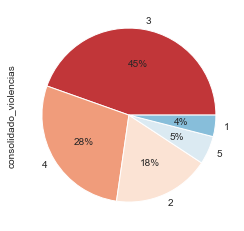

In [18]:
calls['consolidado_violencias'].value_counts().plot(kind='pie', y='consolidado_violencias' , autopct='%1.0f%%')


In [19]:
tres_violencias = calls.loc[calls['consolidado_violencias'] ==3]
tres_violencias

,Unnamed: 0,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,...,tipo_de_violencia_domestica_encode,modalidad_de_violencia_institucional_encode,modalidad_de_violencia_laboral_encode,modalidad_violencia_contra_libertad_reproductiva_encode,modalidad_de_violencia_obstetrica_encode,modalidad_de_violencia_mediatica_encode,modalidad_de_violencia_otras_encode,vinculo_con_la_persona_agresora_encode,genero_de_la_persona_agresora_encode,consolidado_violencias
0,0,2020-01-01,Tucumán,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,5,7,3
1,1,2020-01-01,Tucumán,Mujer,no,si,no,si,si,si,...,1,0,0,0,0,0,0,0,7,3
3,3,2020-01-01,Tucumán,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,5,7,3
5,5,2020-01-02,Tucumán,Mujer,si,si,no,no,si,si,...,1,0,0,0,0,0,0,5,7,3
9,9,2020-01-03,Tucumán,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,59994,2022-05-17,La Rioja,Mujer,si,si,no,no,si,si,...,1,0,0,0,0,0,0,0,7,3
59591,59995,2022-05-18,La Rioja,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,0,7,3
59592,59996,2022-05-27,La Rioja,Mujer,no,si,no,si,no,si,...,1,0,0,0,0,0,0,5,7,3
59594,59998,2022-06-11,La Rioja,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,0,7,3


In [20]:
calls

,Unnamed: 0,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,...,tipo_de_violencia_domestica_encode,modalidad_de_violencia_institucional_encode,modalidad_de_violencia_laboral_encode,modalidad_violencia_contra_libertad_reproductiva_encode,modalidad_de_violencia_obstetrica_encode,modalidad_de_violencia_mediatica_encode,modalidad_de_violencia_otras_encode,vinculo_con_la_persona_agresora_encode,genero_de_la_persona_agresora_encode,consolidado_violencias
0,0,2020-01-01,Tucumán,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,5,7,3
1,1,2020-01-01,Tucumán,Mujer,no,si,no,si,si,si,...,1,0,0,0,0,0,0,0,7,3
2,2,2020-01-01,Tucumán,Mujer,no,si,no,no,no,si,...,1,0,0,0,0,0,0,5,7,2
3,3,2020-01-01,Tucumán,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,5,7,3
4,4,2020-01-02,Tucumán,Mujer,si,si,si,si,no,si,...,1,0,0,0,0,0,0,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,59998,2022-06-11,La Rioja,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,0,7,3
59595,59999,2022-06-16,La Rioja,Mujer,si,si,no,si,no,si,...,1,0,0,0,0,0,0,5,7,4
59596,60000,2022-06-18,La Rioja,Mujer,si,si,no,no,no,si,...,1,0,0,0,0,0,0,0,7,3
59597,60001,2022-06-20,La Rioja,Mujer,si,si,no,si,no,si,...,1,0,0,0,0,0,0,5,7,4


In [21]:
calls.to_csv('final_data_calls.csv')